Data Science Intern - LetsGrowMore

Author: Divyanshu Agrawal

Task 3: Prediction using Decision Tree algorithm


Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['class']=iris.target
# iris_df.head()
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Replacing the categorical data to numerical data of feature names 

In [3]:
iris_df = iris_df.replace({'class' : 0},
                          "Iris-setosa")
iris_df = iris_df.replace({'class' : 1},
                          "Iris-versicolour")
iris_df = iris_df.replace({'class' : 2},
                          "Iris-virginica")

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Checking for null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Now let's seperate features and target

In [7]:
x = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values
y = iris_df['class']

Splitting the data into training and test set

In [8]:
# For that we need to import some other library
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Now model our data using Decision Tree Classifier

In [10]:
# Importing libraries for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [11]:
classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Predicting the accuracy

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
prediction = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test,prediction))

Accuracy: 0.9333333333333333


Visualizing the result graphically

[Text(116.24999999999999, 203.85, 'petal width (cm) <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = Iris-setosa'),
 Text(98.36538461538461, 158.55, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Iris-setosa'),
 Text(134.1346153846154, 158.55, 'class <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = Iris-versicolour'),
 Text(71.53846153846153, 113.25, 'petal width (cm) <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = Iris-versicolour'),
 Text(35.76923076923077, 67.95000000000002, 'class <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]\nclass = Iris-versicolour'),
 Text(17.884615384615383, 22.650000000000006, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Iris-versicolour'),
 Text(53.653846153846146, 22.650000000000006, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(107.30769230769229, 67.95000000000002, 'class <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 

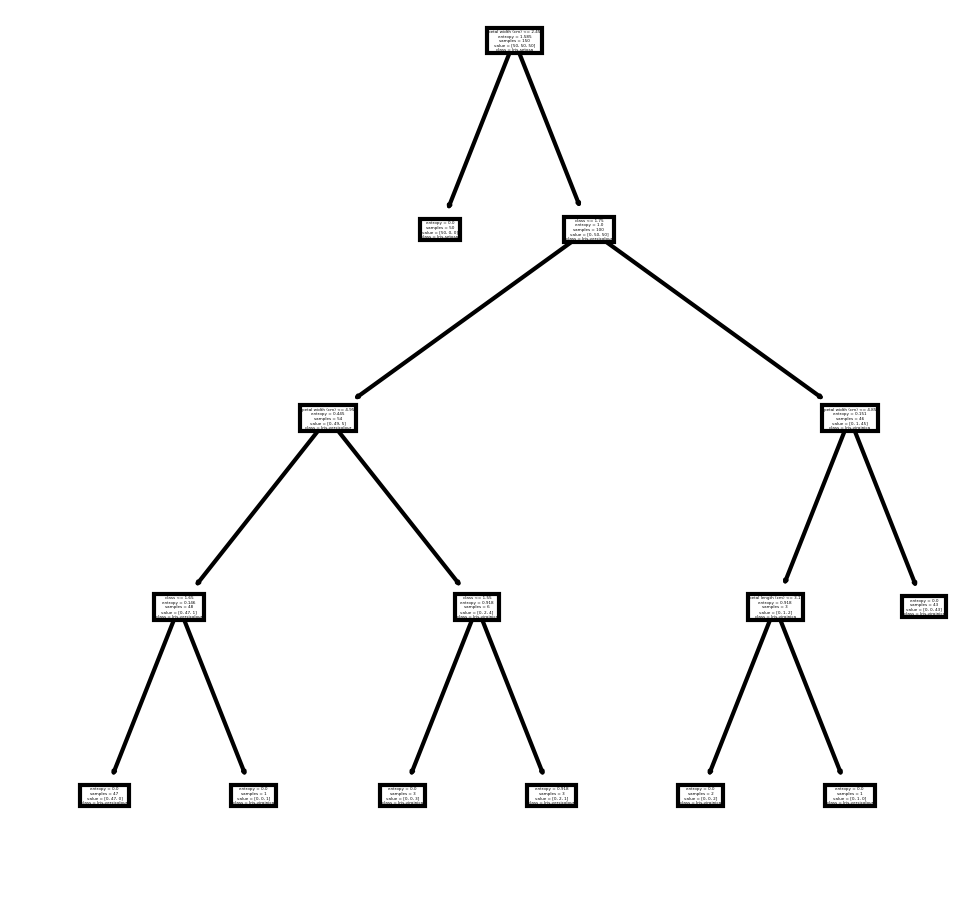

In [16]:
f_name = iris_df.columns[1:5]
c_name = iris_df["class"].unique().tolist()
classifier.fit(x,y)

#setting dpi=300 to make image more clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (1,1), dpi = 300)
tree.plot_tree(classifier, feature_names=f_name, class_names=c_name)

Making random prediction

In [17]:
x_new = [[5.7,4.0,1.6,0.3]]
new_pred = classifier.predict(x_new)
new_pred

array(['Iris-setosa'], dtype=object)